In [1]:
import tensorflow as tf

In [14]:
import tensorflow.keras as keras

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
from tensorflow.keras.datasets import imdb

Using TensorFlow backend.


In [5]:
import pickle

Loading DataSet

In [6]:
num_words = 10000

In [7]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [8]:
print(len(X_train))
print(len(X_test))

25000
25000


In [9]:
max_len = 256
embedding_size = 32
batch_size = 128

# Normalize length of the vectors

In [10]:
pad = 'post' # 'pre'

In [11]:
X_train_pad = pad_sequences(X_train,maxlen=max_len, padding=pad,truncating=pad)
X_test_pad = pad_sequences(X_test,maxlen=max_len, padding=pad,truncating=pad)

In [12]:
X_train_pad.shape, X_test_pad.shape

((25000, 256), (25000, 256))

### Creating neural network

In [35]:
model = keras.Sequential()

In [36]:
model.add(tf.keras.layers.Embedding(input_dim=num_words,output_dim=embedding_size,input_length=max_len,name='layer_embedding'))

In [37]:
model.add(tf.keras.layers.Flatten())

In [38]:
model.add(tf.keras.layers.Dense(250,activation='relu'))

In [39]:
model.add(tf.keras.layers.Dropout(0.75))

In [40]:
# Final
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=[tf.keras.metrics.AUC(),'accuracy'])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 256, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               2048250   
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 2,368,501
Trainable params: 2,368,501
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train_pad,y_train,epochs=1,validation_data=(X_test_pad,y_test),batch_size=batch_size)

196/196 [==============================] - 3s 15ms/step - loss: 0.5123 - auc_2: 0.8176 - accuracy: 0.7235 - val_loss: 0.3291 - val_auc_2: 0.9354 - val_accuracy: 0.8574


In [44]:
eval_ = model.evaluate(X_test_pad, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3291 - auc_2: 0.9354 - accuracy: 0.8574


In [46]:
eval_

[0.3291057348251343, 0.9353583455085754, 0.8573600053787231]

In [45]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

# Word Embedding Visualization

In [48]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [49]:
sentences = [
    ['this','is','a','very','good','NLP','course'],
    ['this','is','a','NLP','course'],
    ['Word2Vec','NLP','text'],
    ['word','embedding','NLP'],
    ['NLP','course','Word2Vec','embedding']
]

In [50]:
model = Word2Vec(sentences, min_count=1)

In [52]:
print(model)

Word2Vec(vocab=11, size=100, alpha=0.025)


In [53]:
words = list(model.wv.vocab)
print(words)

['this', 'is', 'a', 'very', 'good', 'NLP', 'course', 'Word2Vec', 'text', 'word', 'embedding']


In [58]:
print(model['course'])
print(len(model['course']))

[ 1.3822746e-03  2.2828465e-03  2.4949040e-03 -1.0671936e-03
  4.4492139e-03  3.3949027e-04  1.7095858e-03  3.5732731e-04
  8.8509194e-05  3.5073103e-03 -4.7271503e-03  3.4126261e-04
 -3.3906791e-03 -3.9357552e-03  1.3446050e-03  1.1050621e-03
  2.0888283e-04  4.2314362e-03  2.7531339e-03  1.5800101e-04
  1.4283962e-03  1.9019279e-03  3.3004028e-03  2.0442728e-03
  3.2097695e-03  3.0457510e-03 -4.8000272e-03 -2.6726723e-03
 -2.6791818e-03 -4.1607814e-03  1.7369305e-03 -2.6086266e-03
 -3.8380728e-03 -4.5804164e-04  2.8012712e-03  4.7559794e-03
  4.8731137e-03  4.1016890e-03  2.3711666e-03 -3.0580526e-03
  7.3784380e-04 -8.8069920e-04 -2.7650716e-03 -4.6734121e-03
 -9.2280691e-04 -2.7930201e-03  7.0240075e-04 -3.6278521e-03
  3.9374009e-03 -1.8890770e-03  4.6724677e-03  2.9394568e-03
 -4.4590812e-03 -9.3564321e-04 -1.2913994e-03  3.5552247e-03
  2.6567292e-03  1.5206382e-03  2.2733721e-03 -6.7199732e-04
 -1.9788737e-03 -2.0002162e-03  3.1735536e-03 -4.4340617e-03
 -2.2323166e-03  1.84690

C:\Users\vorme\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
C:\Users\vorme\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
model.save('blabla.bin')
new_model = Word2Vec.load('blabla.bin')

In [59]:
X = model[model.wv.vocab]

C:\Users\vorme\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [60]:
X.shape

(11, 100)

In [61]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

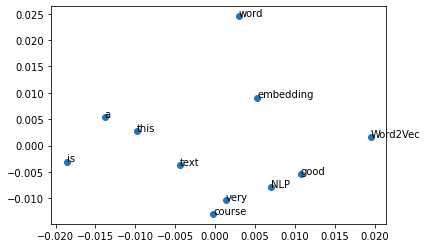

In [62]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word,xy=(result[i,0], result[i,1]))
plt.show()

In [63]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename,binary=True)

In [64]:
result = model.most_similar(positive=['woman','king'],negative=['man'],topn=5)

In [65]:
print(result)

[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133)]


In [66]:
model.most_similar(positive=['woman','king'],topn=5)

[('man', 0.6628609895706177),
 ('queen', 0.6438563466072083),
 ('girl', 0.6136074662208557),
 ('princess', 0.6087510585784912),
 ('monarch', 0.5900576114654541)]